In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open(f"real_performance_full_50_generated_train_graphs.pickle",'rb') as f:
    data = pickle.load(f)

10000_size


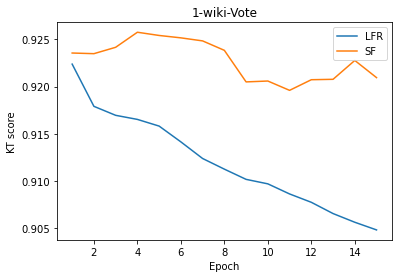

100000_size


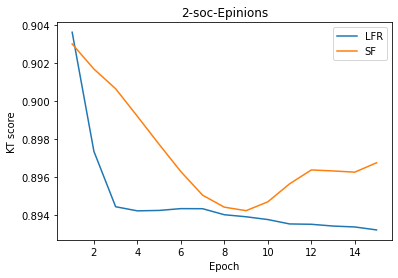

300000_size


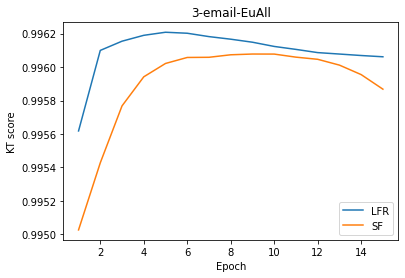

<Figure size 432x288 with 0 Axes>

In [3]:
for graph in ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']:
    size = list(data[graph]['LFR'].keys())[0]
    print(size)
    lfr = data[graph]['LFR'][f'{size}']
    sf = data[graph]['SF'][f'{size}']

    xs = [j for  j in range(1,16)]
    xlfr = []
    xsf = []
    for epoch in range(15):
        xlfr.append(lfr['1_copies']['pred'][f'{epoch}_epoch']['kt'])
        xsf.append(sf['1_copies']['pred'][f'{epoch}_epoch']['kt'])

    plt.plot(xs,xlfr,label  = "LFR")
    plt.plot(xs,xsf,label  = "SF")
    plt.title(graph)
    plt.ylabel("KT score")
    plt.xlabel("Epoch")
    #plt.ylim(0.8,1)
    plt.legend()
    plt.show()
    plt.clf()

In [4]:
import pickle
from scipy.stats import kendalltau,pearsonr

def metrics(pred_results,real_results):

    n = len(pred_results)
    print(f"Number of nodes: {n}")
    assert n == len(real_results)

    nodes_sorted_pred = sorted(range(n),reverse=True,key=lambda k: pred_results[k])
    nodes_sorted_real = sorted(range(n),reverse=True,key=lambda k: real_results[k])

    percentages = range(1,101)
    m_dict = {'equal':{},'in_top':{},'pearson':{},'kendall':{}}
    
    values = []
    for p in percentages:
        values.append(int(p*n/100))
        m_dict['equal'][p] = []
        m_dict['in_top'][p] = []
        m_dict['pearson'][p] = []
        m_dict['kendall'][p] = []

    m_dict['fullkendall'] = kendalltau(pred_results,real_results)


    # nodos igual posicion top
    for idx, p in enumerate(values):
        print(f"Coincident: {idx}",end='\r')
        c = 0
        for j in range(p):
            if nodes_sorted_pred[j] == nodes_sorted_real[j]:
                c += 1
        m_dict['equal'][percentages[idx]].append(round(c/p*100,4))
    print("")
    # nodos acertados top
    for idx, p in enumerate(values):
        print(f"In top: {idx}",end='\r')
        a = sum(1 for item in nodes_sorted_pred[:p] if item in nodes_sorted_real[:p])
        m_dict['in_top'][percentages[idx]].append(round(a/p*100,4))
    print("")
    # Pearson correlation
    for idx, p in enumerate(values):
        print(f"Pearson: {idx}",end='\r')
        pear = pearsonr(nodes_sorted_pred[:p],nodes_sorted_real[:p])
        m_dict['pearson'][percentages[idx]].append(pear)
    print("")

    # Kendall
    for idx, p in enumerate(values):
        print(f"kendall: {idx}",end='\r')
        pear = tuple(kendalltau(nodes_sorted_pred[:p],nodes_sorted_real[:p]))
        m_dict['kendall'][percentages[idx]].append(pear)
    print("")

    return m_dict

In [5]:
M = {}

for graph in ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']:

    M[graph] = {"SF": {}, "LFR": {}}
    
    size = list(data[graph]['LFR'].keys())[0]
    print(f"Graph: {graph}, size: {size}")

    lfr_real = data[graph]['LFR'][f'{size}']['real']
    lfr_pred = data[graph]['LFR'][f'{size}']['1_copies']['pred'][f'{9}_epoch']['pred']
    sf_real = data[graph]['SF'][f'{size}']['real']
    sf_pred = data[graph]['SF'][f'{size}']['1_copies']['pred'][f'{9}_epoch']['pred']

    M[graph]["SF"] = metrics(sf_pred,sf_real)

    with open(f"metrics_lfr_sf_50_generated_graphs.pickle","wb") as fopen:
        pickle.dump(M,fopen)
    
    M[graph]["LFR"] = metrics(lfr_pred,lfr_real)

    with open(f"metrics_lfr_sf_50_generated_graphs.pickle","wb") as fopen:
        pickle.dump(M,fopen)

Graph: 1-wiki-Vote, size: 10000_size
Number of nodes: 7115
Coincident: 99
In top: 99
Pearson: 99
kendall: 99
Number of nodes: 7115
Coincident: 99
In top: 99
Pearson: 99
kendall: 99
Graph: 2-soc-Epinions, size: 100000_size
Number of nodes: 75879
Coincident: 99


In [3]:
import pickle

with open(f"metrics_lfr_sf_50_generated_graphs.pickle","rb") as fopen:
    daux = pickle.load(fopen)

In [7]:
daux['1-wiki-Vote']['SF']["equal"].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

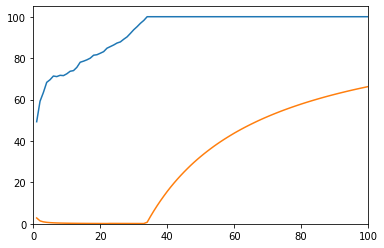

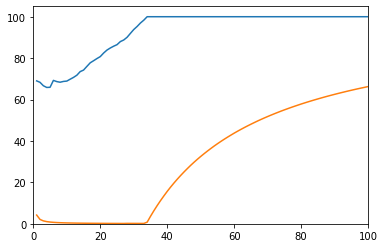

In [12]:
import matplotlib.pyplot as plt


for metric in ['in_top','equal']:

    xs = [j for j in daux['1-wiki-Vote']['SF'][metric].keys()]
    ys = [daux['1-wiki-Vote']['SF'][metric][j] for j in xs]
    plt.plot(xs,ys)
    plt.ylim(0,105)
    plt.xlim(0,100)

plt.show()

for metric in ['in_top','equal']:

    xs = [j for j in daux['1-wiki-Vote']['LFR'][metric].keys()]
    ys = [daux['1-wiki-Vote']['LFR'][metric][j] for j in xs]
    plt.plot(xs,ys)
    plt.ylim(0,105)
    plt.xlim(0,100)

plt.show()

ValueError: x and y can be no greater than 2-D, but have shapes (100,) and (100, 1, 2)

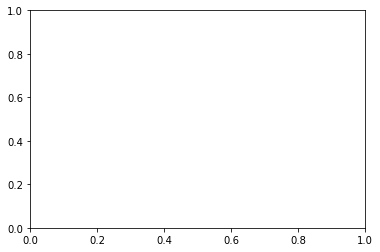

In [43]:
import matplotlib.pyplot as plt

for metric in ['pearson','']:

    xs = [j for j in m[metric].keys()]
    ys = [m[metric][j] for j in xs]
    plt.plot(xs,ys)
plt.ylim(-1,1)
plt.xlim(0,100)
plt.show()

10000_size
0.9117732095157278
0.9165846416270139
100000_size
0.8932558454635534
0.8899296470394796
300000_size
0.9961299862809959
0.996134554916623
900000_size
0.8210420753041707
0.8134533063488811
